In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the  Cleaned Dataset

In [2]:
# loading the dataset
df = pd.read_csv("Uber_Drives_Clean.csv")

In [3]:
# displaying the dataset
df.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,4,6.0
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,01:25:00,2016-01-02,01:37:00,5,12.0
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,5,13.0
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,14.0
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,2,67.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATEGORY*   850 non-null    object 
 1   START*      850 non-null    object 
 2   STOP*       850 non-null    object 
 3   MILES*      850 non-null    float64
 4   PURPOSE*    850 non-null    object 
 5   Start Date  850 non-null    object 
 6   Start Time  850 non-null    object 
 7   End Date    850 non-null    object 
 8   End Time    850 non-null    object 
 9   Weekday     850 non-null    int64  
 10  Duration    850 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 46.5+ KB


The cleaned version of the Uber Drives Dataset stores the following features:

- CATEGORY* : Whether the trip was a business trip or personal
- START* : Location where the trip started
- STOP* : Location where the trip ended
- MILES* : Miles covered during the trip
- PURPOSE* : Purpose of the trip (Meals, Errands, Meetings, Customer Support etc.)
- Start Date : Date when the trip started
- Start Time : Time when the trip started
- End Date : Date when the trip ended
- End Time : Time when the trip ended
- Weekday : Day of the week the trip took place on, 0 represents Monday
- Duration: Time taken during the trip, in minutes

The dataset can now be analysed as it has been cleaned previously and does not have any issues.

# Data Analysis

The average distance covered in a trip is ~10.5 miles while the average time duration is 21 minutes.

In [5]:
# statistical summary of the numerical variables
df.describe()

,MILES*,Weekday,Duration
count,850.000000,850.000000,850.000000
mean,10.477765,3.023529,21.301176
std,22.443873,1.992781,24.237316
min,0.500000,0.000000,1.000000
25%,2.800000,1.000000,10.000000
50%,5.850000,3.000000,16.000000
75%,10.400000,5.000000,25.000000
max,310.300000,6.000000,330.000000


The analysis is started off by having a look at the distribution of the 'CATEGORY\*' and 'PURPOSE\*' of the trips successively.

Business    781
Personal     69
Name: CATEGORY*, dtype: int64


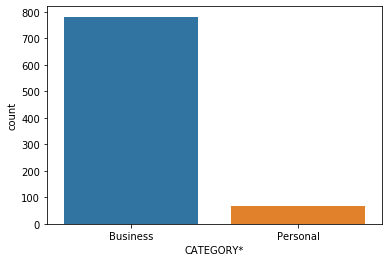

In [6]:
# bar plot of the 'CATEGORY*' column
print(df['CATEGORY*'].value_counts())
sns.countplot(x='CATEGORY*', data=df)

It is noted that only 8% of the trips have been marked as personal trips. This clearly means that the rider uses Uber mainly for his business trips.  

Meeting            485
Meal/Entertain     139
Errand/Supplies     92
Customer Visit      86
Temporary Site      25
Between Offices     17
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64


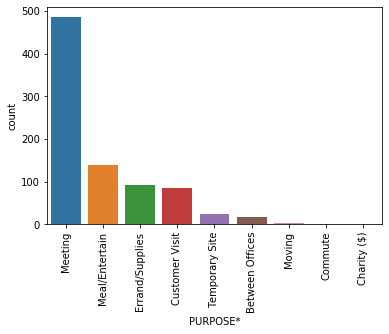

In [7]:
# bar plot of the 'PURPOSE*' column
print(df['PURPOSE*'].value_counts())
sns.countplot(x='PURPOSE*', data=df, order=df['PURPOSE*'].value_counts().index)
plt.xticks(rotation=90);

Maximum of the trips are made for the purpose of 'Meeting', which again coincides with the fact that the rider mainly uses the cab service for business trips.  

4    152
1    122
0    121
6    118
5    117
2    113
3    107
Name: Weekday, dtype: int64


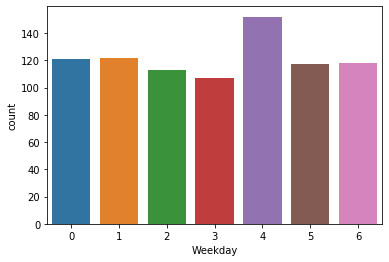

In [8]:
# count of the number of trips made on the different days of the week
print(df['Weekday'].value_counts())
sns.countplot(x='Weekday', data=df);

There is a significant increase in the number of trips made on Friday, compared to the other days of the week. This increase may be attributed to the fact that the next two days are weekend and hence, there is no work. So it is possible that the rider prefers to conclude his work on Friday, which leads to an increase in the no. of trips taking place on Friday. This observation can be further analysed with respect to the miles travelled on Fridays.

Now, the distribution of the 'MILES*' variable is analysed.

(0, 50)

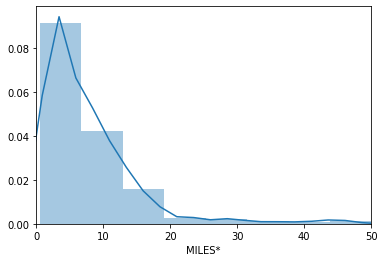

In [11]:
# histogram and kdeplot of the 'MILES*' variable
sns.distplot(df['MILES*'])
plt.xlim(0, 50)

On plotting the histogram of the variable, it is observed that the distribution is positively skewed, with a very elongated right tail. 

Limiting the x-axis to (0, 50), the shape of the distribution becomes much more clearer. It is positively skewed and majority of the values lie belowe 20. 

The elongated right tail might be a result of the presence of extreme values, hence, a boxplot of this variable is plotted to substantiate our claim.

(0, 50)

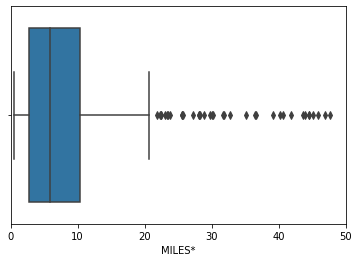

In [10]:
# boxplot to look for outliers
sns.boxplot(df['MILES*'])
plt.xlim(0, 50)

The above boxplot shows the presence of many outliers in the 'MILES*' variable.

Similarly, the distribution of 'Duration' is analysed.

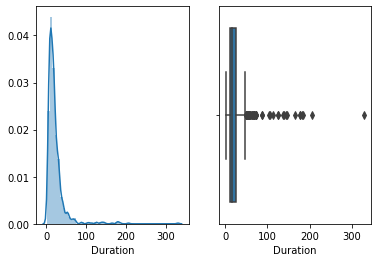

In [13]:
# histogram and kdeplot of the 'Duration' variable
plt.subplot(1, 2, 1)
sns.distplot(df['Duration'])
#plt.xlim(0, 50)

# boxplot to look for outliers
plt.subplot(1, 2, 2)
sns.boxplot(df['Duration'])
#plt.xlim(0, 50)

The 'Duration' variable is also positively skewed with the presence of outliers. 

The similar distributions of the two variables 'MILES*' and 'Duration' can lead one to think that these variables share a relationship with each other. This will be deeply analysed later.

It can be expected that the person takes the maximum number of cab rides during the office hours. This is what we examine next.

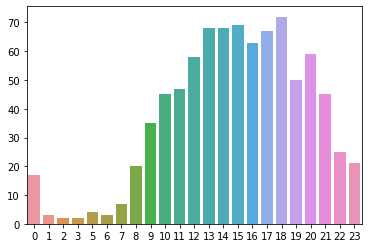

In [14]:
# count of the number of trips made on the different hours of the day
start_hour = pd.to_datetime(df['Start Time']).dt.hour.value_counts()

sns.barplot(x=start_hour.index, y=list(start_hour))

As expected, the rider has the most number of trips between 9 am in the morining to 9 pm at night. Other than that, there are very few trips in the night hours.

The 'End Time' of the trips also follows a similar distribution. 

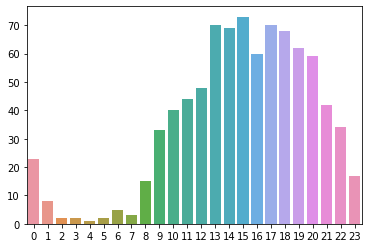

In [15]:
# count of the number of trips made on the different days of the week
end_hour = pd.to_datetime(df['End Time']).dt.hour.value_counts()

sns.barplot(x=end_hour.index, y=list(end_hour))

One can also analyse the frequency of trips during the different months of the year. However, the person was out of country for different time intervals in the months of February, August, September, October and December. Hence the no. of trips for these months might be misleading.

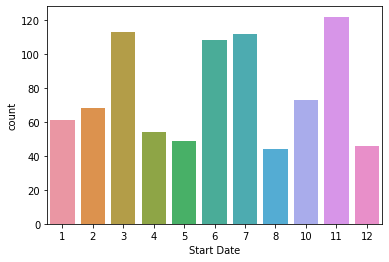

In [16]:
# count of the number of trips made on the different months of the year
sns.countplot(pd.to_datetime(df['Start Date']).dt.month)

If the months of February, August, October and December are left out, the no. of trips made in the months of March, June, July and November have been significantly high. Yet, the months of January, April and May mark a very low no. of trips, even lesser than the months in which the rider stayed out of country.

Similarly, the no. of trips taken on different days of the month can be studied.

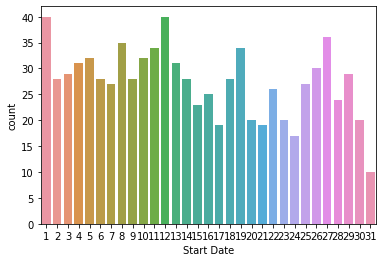

In [17]:
# count of the number of trips made on the different days of the month
sns.countplot(pd.to_datetime(df['Start Date']).dt.day)

There seems to be some sort of cyclical pattern in this plot, where the no. of trips gradually decreases and then increases. 

Next, the start and end locations of the trips are inspected to get an idea of the areas that the rider frequents.

In [18]:
# most frequent start locations
df['START*'].value_counts().nlargest(10)

Cary              201
Morrisville        85
Whitebridge        68
Durham             37
Raleigh            28
Apex               17
Westpark Place     17
Berkeley           16
Midtown            14
Kissimmee          11
Name: START*, dtype: int64

In [19]:
# most frequent end locations
df['STOP*'].value_counts().nlargest(10)

Cary              203
Morrisville        84
Whitebridge        65
Durham             36
Raleigh            29
Apex               17
Westpark Place     16
Berkeley           16
Kissimmee          12
Midtown            11
Name: STOP*, dtype: int64

The one location that the person travels to and from regularly is 'Cary' as ~25% of the total trips either start or end here. Other than that, 'Morrisville' and 'Whitebridge' are also frequent locations of the trips.

A filtered dataframe with the most frequent locations is made for further analysis.

In [20]:
# dataframe of most frequent locations
most_frequent_stops = df['STOP*'].value_counts().nlargest(10).index

df_filtered = df[df['STOP*'].isin(most_frequent_stops)]

In [22]:
pd.crosstab(df_filtered['STOP*'], df_filtered['CATEGORY*'])

CATEGORY*,Business,Personal
STOP*,,
Apex,17,0
Berkeley,16,0
Cary,197,6
Durham,36,0
Kissimmee,6,6
Midtown,10,1
Morrisville,80,4
Raleigh,29,0
Westpark Place,12,4


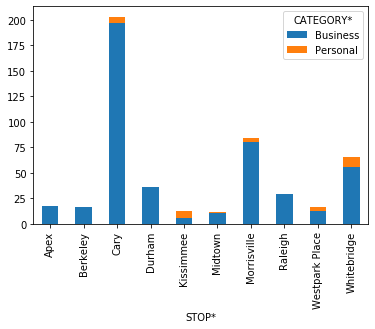

In [21]:
# stacked bar chart 
pd.crosstab(df_filtered['STOP*'], df_filtered['CATEGORY*']).plot.bar(stacked=True)

Even in thse locations, the majority of the trips are made for the purpose of 'Meeting' only, one can also observe that there have been considerable customer visits in 'Cary'. 

In [24]:
#df

It is also noted that for some trips, the start and end locations correspond to the same area. So, the dataframe is divided into two - one with trips in the same area and the other with trips in different areas. These two dataframes can be considered to refer to short distance trips and long distance trips respectively.

In [25]:
# dataframe of trips in the same area
df_same_area = df[df['START*']==df['STOP*']]

df_same_area.describe()

,MILES*,Weekday,Duration
count,118.000000,118.000000,118.000000
mean,4.683051,3.008475,14.805085
std,5.028471,1.958963,11.862646
min,0.500000,0.000000,1.000000
25%,1.800000,1.000000,7.250000
50%,3.400000,3.000000,12.000000
75%,5.500000,5.000000,16.000000
max,39.200000,6.000000,65.000000


In [26]:
# dataframe of trips in different areas
df_diff_area = df[df['START*']!=df['STOP*']]

df_diff_area.describe()

,MILES*,Weekday,Duration
count,732.000000,732.000000,732.000000
mean,11.411885,3.025956,22.348361
std,23.972887,1.999489,25.531188
min,0.500000,0.000000,2.000000
25%,3.000000,1.000000,10.000000
50%,6.250000,3.000000,17.000000
75%,10.500000,5.000000,25.000000
max,310.300000,6.000000,330.000000


Only ~14% of the trips start and end in the same area.

Short distance trips have an average duration of 15 minutes and cover an average distance of ~5 miles, whereas long distance trips generally take 22 minutes and cover ~11 miles.

It can happen that the short distance trips take place only during specific hours of the day. And that is what has been analysed next.

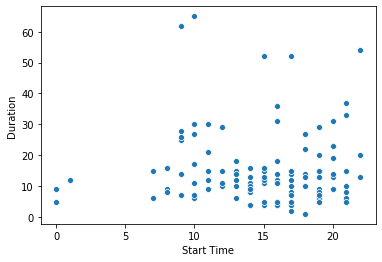

In [28]:
# for trips in same area
sns.scatterplot(x=pd.to_datetime(df_same_area['Start Time']).dt.hour, y=df_same_area['Duration'])

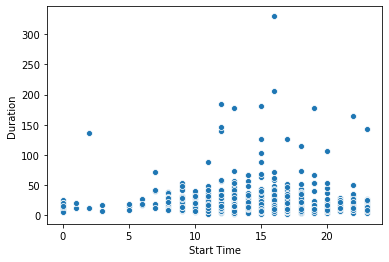

In [29]:
# for trips in different areas
sns.scatterplot(x=pd.to_datetime(df_diff_area['Start Time']).dt.hour, y=df_diff_area['Duration'])

The short distance trips in the same area seem to take place during the day hours, whereas the trips in different areas extend into the night hours as well, evident from the above two plots.

It was observed previously that the count of trips taking place on Fridays was significantly high compared to other days of the week. A dataframe which stores the information of only those trips which take place on Friday is made.

In [30]:
# dataframe for trips that take place on Fridays
df_fri = df[df['Weekday'] == 4]

In [31]:
# statistical summary
df_fri.describe()

,MILES*,Weekday,Duration
count,152.000000,152.0,152.000000
mean,14.517763,4.0,25.013158
std,34.459011,0.0,35.104949
min,0.700000,4.0,2.000000
25%,3.300000,4.0,11.000000
50%,8.450000,4.0,18.000000
75%,11.225000,4.0,24.000000
max,310.300000,4.0,330.000000


The average distance and duration of the trips is higher than the corresponding averages of the entire dataframe or the dataframe of long distance trips.

In [32]:
# finding the no. of trips in same and different areas on Fridays
print(len(df_fri[df_fri['START*'] == df_fri['STOP*']]))
print(len(df_fri[df_fri['START*'] != df_fri['STOP*']]))

14
138


It is also noted that trips starting and ending in different areas are considerably higher on Fridays. Hence, it can be concluded that the person prefers making more trips and winding up his work before the weekends.

Since the time taken and the distance of the trips both are available, one can also study the speed of the vehicle during the different trips. 

count    850.000000
mean       0.410076
std        0.247251
min        0.100000
25%        0.263844
50%        0.363636
75%        0.488810
max        3.800000
Name: Speed, dtype: float64


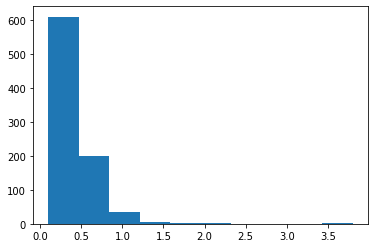

In [33]:
# creating the 'Speed' column
df['Speed'] = df['MILES*']/df['Duration']

# statistical summary
print(df['Speed'].describe())

# histogram
plt.hist(df['Speed']);

The average speed of the trips is 0.41 miles/minute, and it follows a positively skewed distribution.

It is known that the office hours result in more vehicles on the roads and it can be expected that the speed of the vehicle also remains low at that time. 

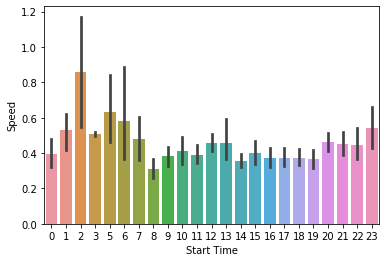

In [34]:
# speed during the different hours of the day
sns.barplot(x=pd.to_datetime(df['Start Time']).dt.hour, y=df['Speed'])

The plot substantiates our claim. It is observed that 8 am to 7 pm mark lower values of car speed, which then increases through the night hours to dawn. 

The speed with which a car travels in a specific area can also suggest about the congestion present in the area, as more congested areas witness more traffic on busy roads and hence lower speeds.

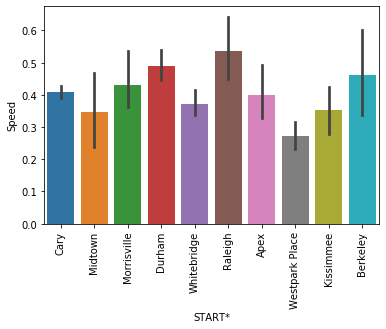

In [35]:
# speed in the different locations of the most frequent starting points
most_frequent_starts = df['START*'].value_counts().nlargest(10).index

df_filtered = df[df['START*'].isin(most_frequent_starts)]

sns.barplot(x='START*', y='Speed', data=df_filtered)
plt.xticks(rotation=90);

'Westpark Place' has the lowest car speed during the trips, whereas 'Raleigh' and 'Kenner' observe the hightest. The speeds in the other areas remain similar.

Finally, the relationship between the variables 'MILES*' and 'Duration' is inspected. 

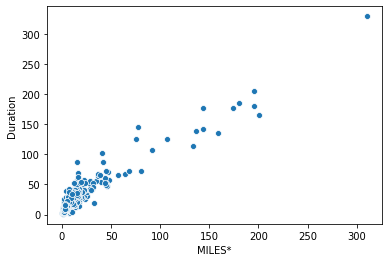

In [36]:
sns.scatterplot(data=df, x='MILES*', y='Duration')

A strong positive relationship exists between the two given variables, which is what one expects by general norms, that the more distance one travels, the more time it takes.

There is no significant difference observed in the plot after marking the datapoints with different colors corresponding to the day of the week that the trip takes place on. So one can conclude that the day on which a trip takes place does not have any effect on its duration.

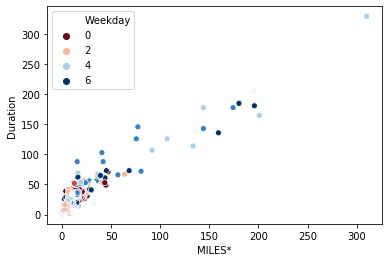

In [37]:
sns.scatterplot(data=df, x='MILES*', y='Duration', hue='Weekday', palette="RdBu")

(0, 100)

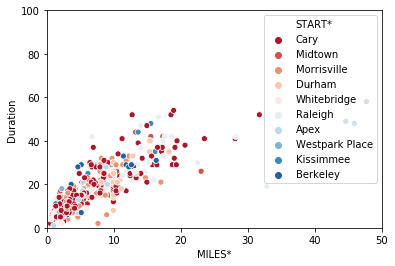

In [42]:
sns.scatterplot(data=df_filtered, x='MILES*', y='Duration', hue='START*', palette="RdBu")
plt.xlim(0, 50)
plt.ylim(0, 100)